# Get Data From PostgreSQL DB

In [176]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from psycopg2 import sql
from sqlalchemy import create_engine

connection_params = {
  "host": "localhost",
  "user": "postgres",
  "password": "post33##",
  "port": "5432"
}
db_name = 'telecom'
connection_params["database"] = db_name
engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")
db_conn = engine.connect()
df = pd.read_sql("select * from \"xdr_data\"", db_conn);
df

Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1       1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3       1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4       1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

           Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       9.16456699548519E+015  ...        1.585461e+07        2.501332e+06   
1                     L77566A  ...        2.024740e+07        1.911173e+07   
2                     D42335A  ...        1.972566e+07        1.469958e+07   
3                     T21824A  ...        2.138812e+07        1.514664e+07   
4                     D88865A  ...        1.525938e+07        1.896287e+07   
...                       ...  ...                 ...                 ...   
149996                D20434A  ...        1.619167e+07        1.176343e+07   
149997                D10223C  ...        1.387723e+07        8.288284e+06   
149998                T51102A  ...        2.266051e+07        1.855903e+06   
149999                L88342B  ...        8.817106e+06        8.305402e+06   
150000                   None  ...        1.163407e+07        1.100941e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0             8.198936e+06        9.656251e+06       2.780823e+08   
1             1.833841e+07        1.722713e+07       6.087501e+08   
2             1.758779e+07        6.163408e+06       2.295846e+08   
3             1.399465e+07        1.097942e+06       7.995382e+08   
4             1.712458e+07        4.152180e+05       5.277072e+08   
...                    ...                 ...                ...   
149996        1.788370e+07        1.967816e+07       5.266097e+08   
149997        1.935015e+07        2.129315e+07       6.268931e+08   
149998        9.963942e+06        5.065760e+06       5.535395e+08   
149999        3.322253e+06        1.317259e+07       3.525370e+08   
150000        1.162685e+07        1.100175e+07       4.220447e+08   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07      1.717444e+08      8.814393e+06   
1            1.170709e+06      5.269042e+08      1.505514e+07   
2            3.956300e+05      4.106926e+08      4.215763e+06   
3            1.084972e+07      7.490399e+08      1.279728e+07   
4            3.529801e+06      5.507095e+08      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06      3.264510e+06      1.348742e+07   
149997       4.735033e+06      7.121804e+08

In [177]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [178]:
#get percentage of null data for each column
percent_missing = df.isna().sum() * 100 / len(df)
missing_percent = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_percent.sort_values('percent_missing', inplace=True)
missing_percent

column_name  \
Youtube DL (Bytes)                                              Youtube DL (Bytes)   
Other UL (Bytes)                                                  Other UL (Bytes)   
Other DL (Bytes)                                                  Other DL (Bytes)   
Gaming UL (Bytes)                                                Gaming UL (Bytes)   
Gaming DL (Bytes)                                                Gaming DL (Bytes)   
Netflix UL (Bytes)                                              Netflix UL (Bytes)   
Netflix DL (Bytes)                                              Netflix DL (Bytes)   
Youtube UL (Bytes)                                              Youtube UL (Bytes)   
Email UL (Bytes)                                                  Email UL (Bytes)   
Email DL (Bytes)                                                  Email DL (Bytes)   
Google UL (Bytes)                                                Google UL (Bytes)   
Google DL (Bytes)                                                Google DL (Bytes)   
Social Media UL (Bytes)                                    Social Media UL (Bytes)   
Social Media DL (Bytes)                                    Social Media DL (Bytes)   
Dur. (ms).1                                                            Dur. (ms).1   
Activity Duration UL (ms)                                Activity Duration UL (ms)   
Total UL (Bytes)                                                  Total UL (Bytes)   
Activity Duration DL (ms)                                Activity Duration DL (ms)   
Total DL (Bytes)                                                  Total DL (Bytes)   
Avg Bearer TP UL (kbps)                                    Avg Bearer TP UL (kbps)   
Avg Bearer TP DL (kbps)                                    Avg Bearer TP DL (kbps)   
Dur. (ms)                                                                Dur. (ms)   
Start                                                                        Start   
Start ms                                                                  Start ms   
End ms                                                                      End ms   
End                                                                            End   
IMSI                                                                          IMSI   
IMEI                                                                          IMEI   
Handset Type                                                          Handset Type   
Handset Manufacturer                                          Handset Manufacturer   
DL TP < 50 Kbps (%)                                            DL TP < 50 Kbps (%)   
50 Kbps < DL TP < 250 Kbps (%)                      50 Kbps < DL TP < 250 Kbps (%)   
250 Kbps < DL TP < 1 Mbps (%)                        250 Kbps < DL TP < 1 Mbps (%)   
DL TP > 1 Mbps (%)                                              DL TP > 1 Mbps (%)   
Nb of sec with Vol DL < 6250B                        Nb of sec with Vol DL < 6250B   
UL TP > 300 Kbps (%)                                          UL TP > 300 Kbps (%)   
50 Kbps < UL TP < 300 Kbps (%)                      50 Kbps < UL TP < 300 Kbps (%)   
10 Kbps < UL TP < 50 Kbps (%)                        10 Kbps < UL TP < 50 Kbps (%)   
UL TP < 10 Kbps (%)                                            UL TP < 10 Kbps (%)   
Nb of sec with Vol UL < 1250B                        Nb of sec with Vol UL < 1250B   
Bearer Id                                                                Bearer Id   
MSISDN/Number                                                        MSISDN/Number   
Last Location Name                                              Last Location Name   
Avg RTT UL (ms)                                                    Avg RTT UL (ms)   
Avg RTT DL (ms)                                                    Avg RTT DL (ms)   
HTTP DL (Bytes)                                                    HTTP DL (Bytes)   
HTTP UL (Bytes)              

In [179]:
#Get columns with missing values >30%
columns_to_remove = missing_percent[missing_percent['percent_missing'] >= 30].index.tolist()
columns_to_remove

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'TCP DL Retrans. Vol (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [180]:
#Drop columns with missing values >30% and drop rows with missing values
clean_df = df.drop(columns_to_remove,axis=1)
clean_df.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [181]:
#Fill Avg RTT Dl and UL
clean_df['Avg RTT DL (ms)'] = clean_df['Avg RTT DL (ms)'].fillna(method='ffill')
clean_df['Avg RTT UL (ms)'] = clean_df['Avg RTT UL (ms)'].fillna(method='ffill')
clean_df.isna().sum()

Bearer Id                          991
Start                                1
Start ms                             1
End                                  1
End ms                               1
Dur. (ms)                            1
IMSI                               570
MSISDN/Number                     1066
IMEI                               572
Last Location Name                1153
Avg RTT DL (ms)                      0
Avg RTT UL (ms)                      0
Avg Bearer TP DL (kbps)              1
Avg Bearer TP UL (kbps)              1
DL TP < 50 Kbps (%)                754
50 Kbps < DL TP < 250 Kbps (%)     754
250 Kbps < DL TP < 1 Mbps (%)      754
DL TP > 1 Mbps (%)                 754
UL TP < 10 Kbps (%)                792
10 Kbps < UL TP < 50 Kbps (%)      792
50 Kbps < UL TP < 300 Kbps (%)     792
UL TP > 300 Kbps (%)               792
Activity Duration DL (ms)            1
Activity Duration UL (ms)            1
Dur. (ms).1                          1
Handset Manufacturer     

In [182]:
#Fill null Handset Type and Handset Manufacturer
clean_df['Handset Type'] = clean_df['Handset Type'].fillna('undefined')
clean_df['Handset Manufacturer'] = clean_df['Handset Manufacturer'].fillna('undefined')
clean_df.isna().sum()

Bearer Id                          991
Start                                1
Start ms                             1
End                                  1
End ms                               1
Dur. (ms)                            1
IMSI                               570
MSISDN/Number                     1066
IMEI                               572
Last Location Name                1153
Avg RTT DL (ms)                      0
Avg RTT UL (ms)                      0
Avg Bearer TP DL (kbps)              1
Avg Bearer TP UL (kbps)              1
DL TP < 50 Kbps (%)                754
50 Kbps < DL TP < 250 Kbps (%)     754
250 Kbps < DL TP < 1 Mbps (%)      754
DL TP > 1 Mbps (%)                 754
UL TP < 10 Kbps (%)                792
10 Kbps < UL TP < 50 Kbps (%)      792
50 Kbps < UL TP < 300 Kbps (%)     792
UL TP > 300 Kbps (%)               792
Activity Duration DL (ms)            1
Activity Duration UL (ms)            1
Dur. (ms).1                          1
Handset Manufacturer     

In [183]:
#Drop any null value row left
clean_df.dropna(inplace=True)
clean_df.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [184]:
clean_df.dtypes
#We can convert Session identifier Bearer Id and Customer identifier MSISDN to int
clean_df['Bearer Id'] = clean_df['Bearer Id'].astype("int64")
clean_df['MSISDN/Number'] = clean_df['MSISDN/Number'].astype("int64")
clean_df

Bearer Id            Start  Start ms              End  \
0      -9223372036854775808   4/4/2019 12:01     770.0  4/25/2019 14:35   
1      -9223372036854775808   4/9/2019 13:04     235.0   4/25/2019 8:15   
2      -9223372036854775808   4/9/2019 17:42       1.0  4/25/2019 11:58   
3      -9223372036854775808   4/10/2019 0:31     486.0   4/25/2019 7:36   
4      -9223372036854775808  4/12/2019 20:10     565.0  4/25/2019 10:40   
...                     ...              ...       ...              ...   
149995 -9223372036854775808   4/29/2019 7:28     615.0   4/30/2019 0:01   
149996  7277825670196679680   4/29/2019 7:28     451.0   4/30/2019 6:02   
149997  7349883264234609664   4/29/2019 7:28     483.0  4/30/2019 10:41   
149998 -9223372036854775808   4/29/2019 7:28     283.0  4/30/2019 10:46   
149999 -9223372036854775808   4/29/2019 7:28     696.0  4/30/2019 10:40   

        End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0        662.0  1823652.0  2.082014e+14    33664962239  3.552121e+13   
1        606.0  1365104.0  2.082019e+14    33681854413  3.579401e+13   
2        652.0  1361762.0  2.082003e+14    33760627129  3.528151e+13   
3        171.0  1321509.0  2.082014e+14    33750343200  3.535661e+13   
4        954.0  1089009.0  2.082014e+14    33699795932  3.540701e+13   
...        ...        ...           ...            ...           ...   
149995   407.0    59587.0  2.082014e+14    33668648496  3.533251e+13   
149996   214.0    81230.0  2.082022e+14    33650688697  3.548311e+13   
149997   187.0    97970.0  2.082019e+14    33663449963  3.566051e+13   
149998   810.0    98249.0  2.082017e+14    33621890103  3.572121e+13   
149999   327.0    97910.0  2.082021e+14    33619622058  8.618620e+13   

           Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       9.16456699548519E+015  ...          15854611.0           2501332.0   
1                     L77566A  ...          20247395.0          19111729.0   
2                     D42335A  ...          19725661.0          14699576.0   
3                     T21824A  ...          21388122.0          15146643.0   
4                     D88865A  ...          15259380.0          18962873.0   
...                       ...  ...                 ...                 ...   
149995                T85721A  ...           6550499.0          18003146.0   
149996                D20434A  ...          16191667.0          11763428.0   
149997                D10223C  ...          13877234.0           8288284.0   
149998                T51102A  ...          22660510.0           1855903.0   
149999                L88342B  ...           8817106.0           8305402.0   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0                8198936.0           9656251.0        278082303.0   
1               18338413.0          17227132.0        608750074.0   
2               17587794.0           6163408.0        229584621.0   
3               13994646.0           1097942.0        799538153.0   
4               17124581.0            415218.0        527707248.0   
...                    ...                 ...                ...   
149995          22468983.0           7149728.0        784435351.0   
149996          17883703.0          19678161.0        526609673.0   
149997          19350146.0          21293148.0        626893062.0   
149998           9963942.0           5065760.0        553539484.0   
149999           3322253.0          13172589.0        352536971.0   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0              14344150.0       171744450.0         8814393.0   
1               1170709.0       526904238.0        15055145.0   
2                395630.0       410692588.0         4215763.0   
3              10849722.0       749039933.0        12797283.0   
4               3529801.0       550709500.0        13910322.0   
...                   ...               ...               ...   
149995         12724751.0      

In [185]:
#We Convert Category columns to string
clean_df['Last Location Name'] = clean_df['Last Location Name'].astype("string")
clean_df['Handset Type'] = clean_df['Handset Type'].astype("string")
clean_df['Handset Manufacturer'] = clean_df['Handset Manufacturer'].astype("string")
clean_df.dtypes

Bearer Id                                  int64
Start                                     object
Start ms                                 float64
End                                       object
End ms                                   float64
Dur. (ms)                                float64
IMSI                                     float64
MSISDN/Number                              int64
IMEI                                     float64
Last Location Name                string[python]
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%)                      float64
10 Kbps < UL TP < 50 Kbps (%)            float64
50 Kbps < UL TP < 30

array([[<Axes: title={'center': 'Bearer Id'}>,
        <Axes: title={'center': 'Start ms'}>,
        <Axes: title={'center': 'End ms'}>,
        <Axes: title={'center': 'Dur. (ms)'}>,
        <Axes: title={'center': 'IMSI'}>,
        <Axes: title={'center': 'MSISDN/Number'}>],
       [<Axes: title={'center': 'IMEI'}>,
        <Axes: title={'center': 'Avg RTT DL (ms)'}>,
        <Axes: title={'center': 'Avg RTT UL (ms)'}>,
        <Axes: title={'center': 'Avg Bearer TP DL (kbps)'}>,
        <Axes: title={'center': 'Avg Bearer TP UL (kbps)'}>,
        <Axes: title={'center': 'DL TP < 50 Kbps (%)'}>],
       [<Axes: title={'center': '50 Kbps < DL TP < 250 Kbps (%)'}>,
        <Axes: title={'center': '250 Kbps < DL TP < 1 Mbps (%)'}>,
        <Axes: title={'center': 'DL TP > 1 Mbps (%)'}>,
        <Axes: title={'center': 'UL TP < 10 Kbps (%)'}>,
        <Axes: title={'center': '10 Kbps < UL TP < 50 Kbps (%)'}>,
        <Axes: title={'center': '50 Kbps < UL TP < 300 Kbps (%)'}>],
       [<A

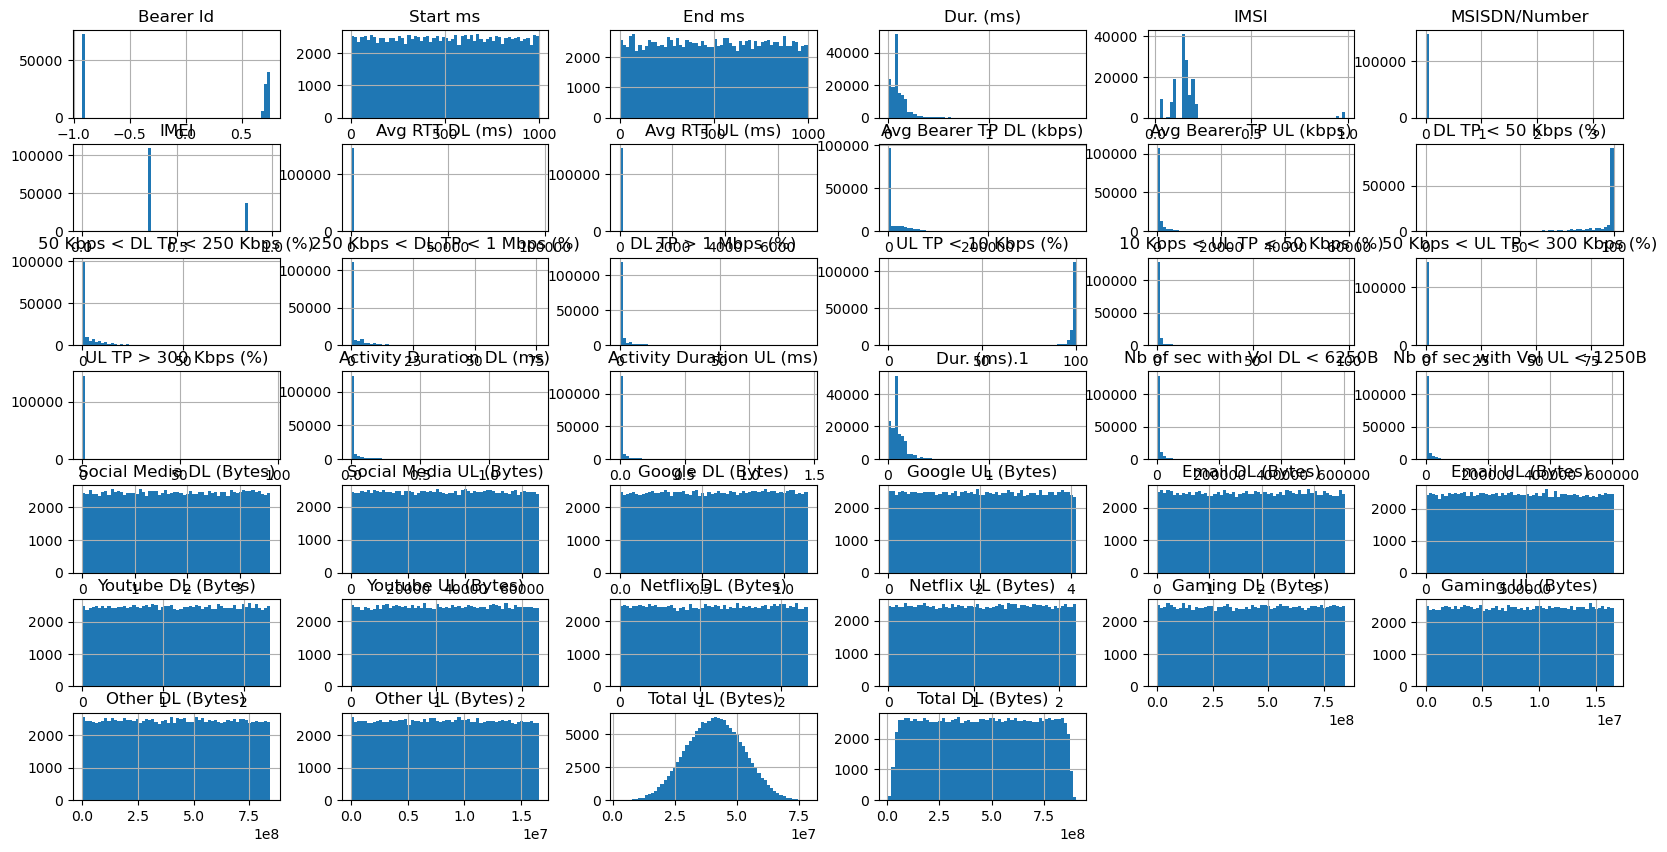

In [186]:
clean_df.hist(bins=60,figsize=(20,10))

In [187]:
clean_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',


# Handset overview analysis

In [188]:
clean_df['Handset Type'].value_counts()

Handset Type
Huawei B528S-23A                             19373
Apple iPhone 6S (A1688)                       9369
Apple iPhone 6 (A1586)                        8967
undefined                                     8820
Apple iPhone 7 (A1778)                        6240
                                             ...  
Tcl Communicatio. Alcatel Pop4 6 4G 7070X        1
Lenovo Moto C                                    1
Fully Holdings (. Oukitel C2                     1
Lenovo Moto G (5Th Gen) Da12936945               1
Shenzhen Jeko Co. Blackview Bv5800 Pro           1
Name: count, Length: 1363, dtype: Int64

<Axes: xlabel='Handset Type'>

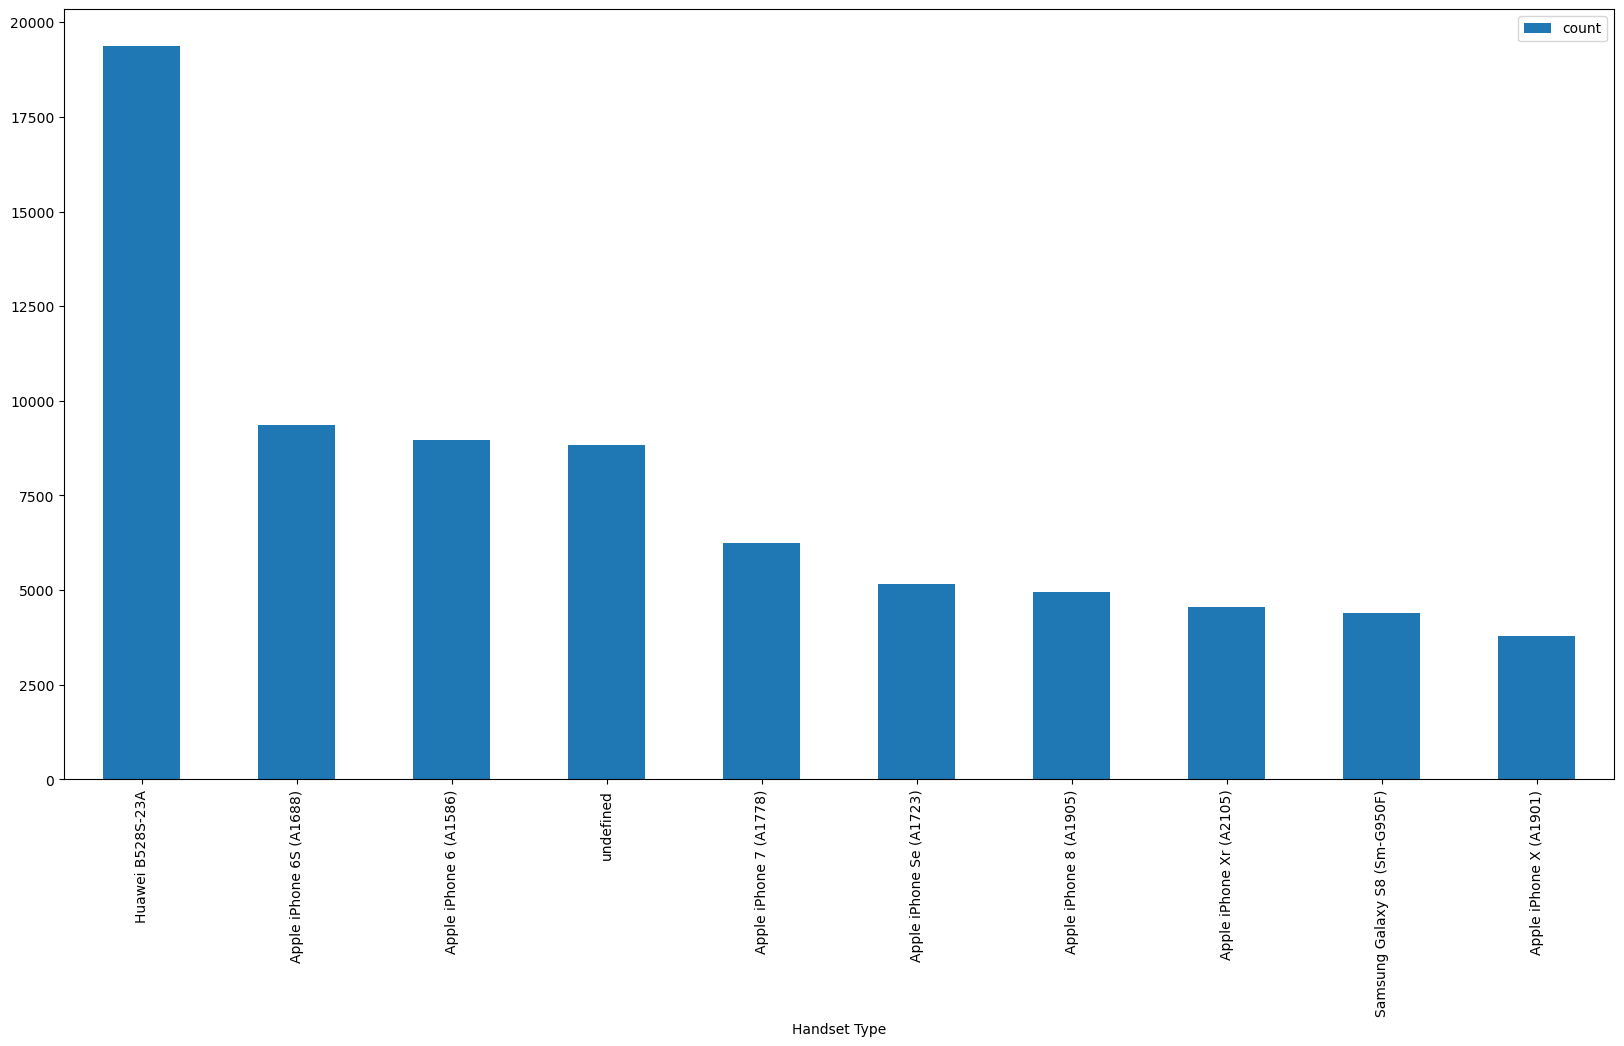

In [189]:
pd.DataFrame(clean_df['Handset Type'].value_counts()[:10]).plot(kind='bar',figsize=(20,10))

In [190]:
clean_df['Handset Manufacturer'].value_counts()

Handset Manufacturer
Apple                                    59072
Samsung                                  39902
Huawei                                   33755
undefined                                 8820
Sony Mobile Communications Ab              925
                                         ...  
Sintave Technology (Group) Co Ltd            1
ZyXEL Communications Corp                    1
Shenzhen Sprocomm Technologies Co Ltd        1
Hewlett-Packard                              1
Shenzhen Gaoxinqi                            1
Name: count, Length: 168, dtype: Int64

<Axes: xlabel='Handset Manufacturer'>

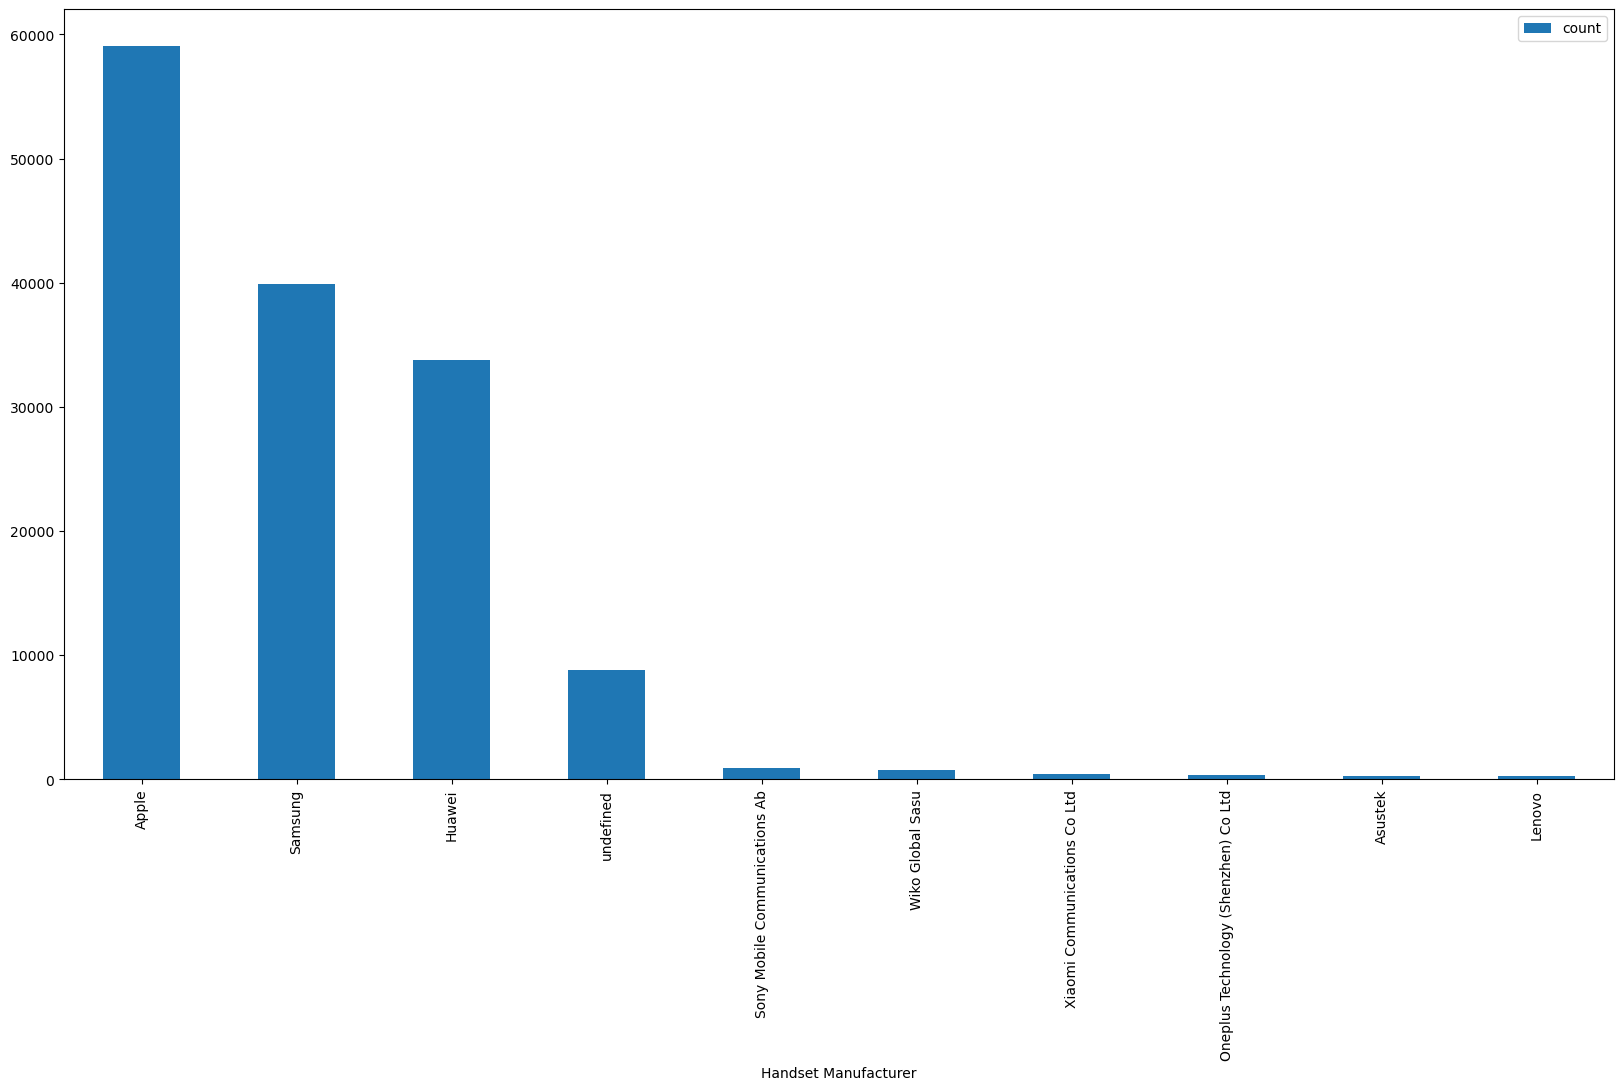

In [191]:
pd.DataFrame(clean_df['Handset Manufacturer'].value_counts()[:10]).plot(kind='bar',figsize=(20,10))

In [192]:
samsung_manu = clean_df[clean_df['Handset Manufacturer'] == 'Samsung']


<Axes: xlabel='Handset Type'>

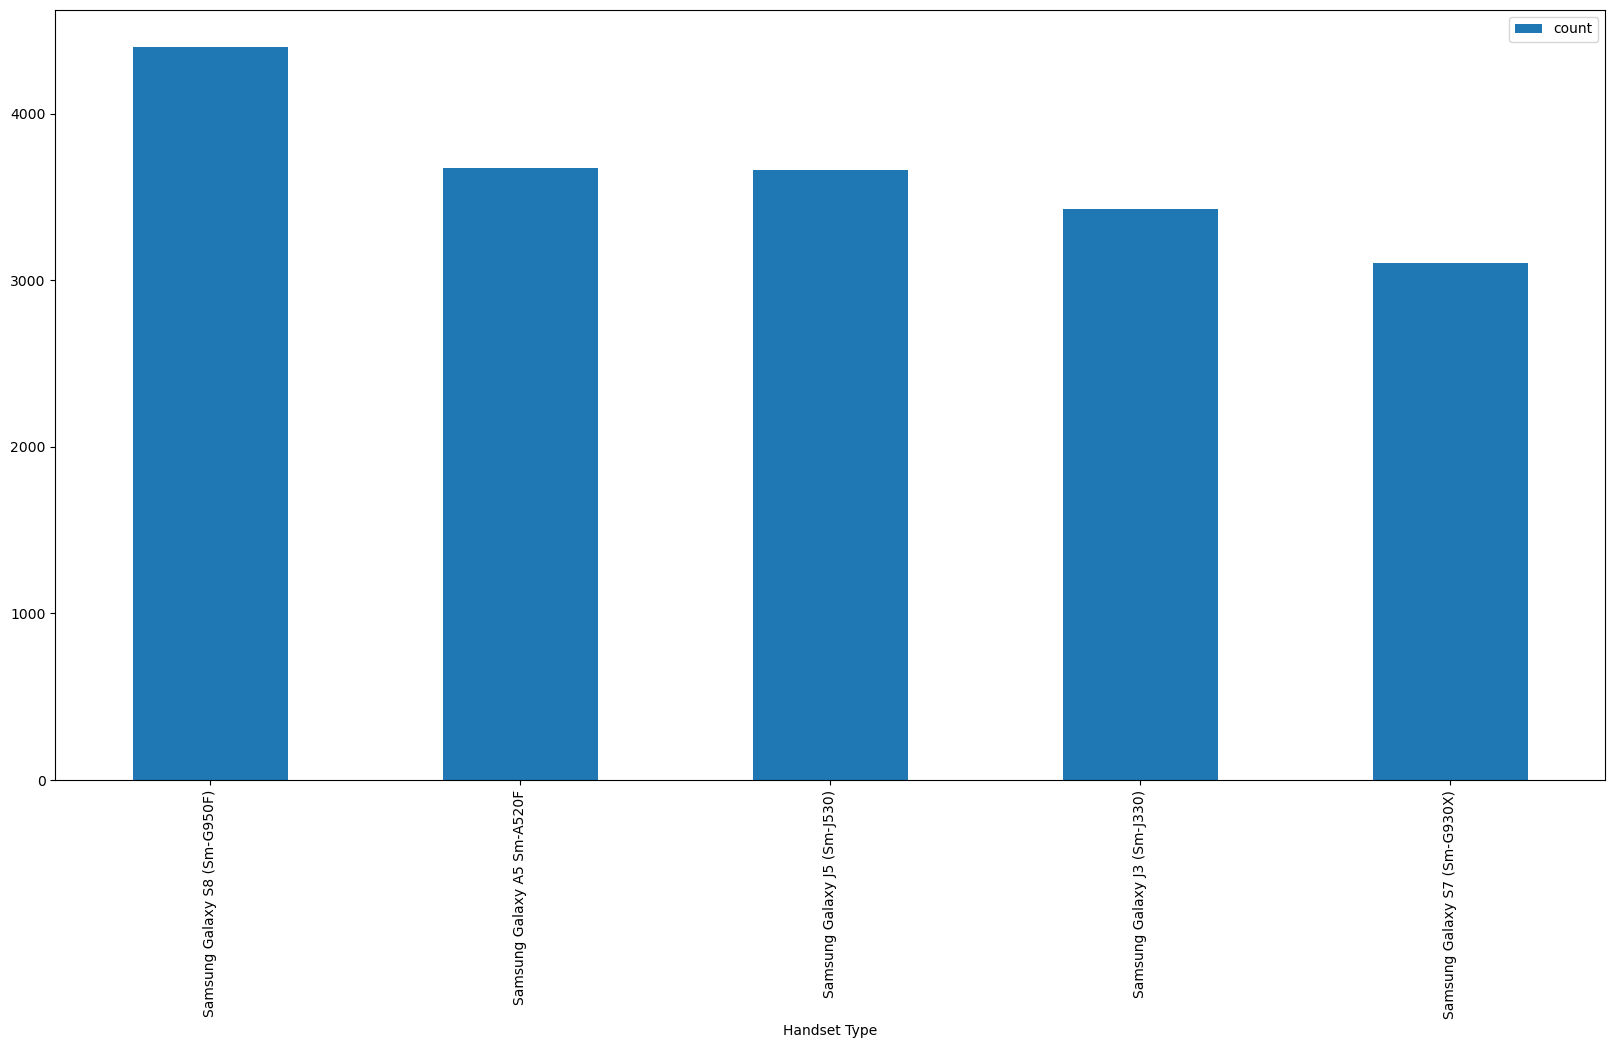

In [193]:
pd.DataFrame(samsung_manu['Handset Type'].value_counts()[:5]).plot(kind='bar',figsize=(20,10))

<Axes: xlabel='Handset Type'>

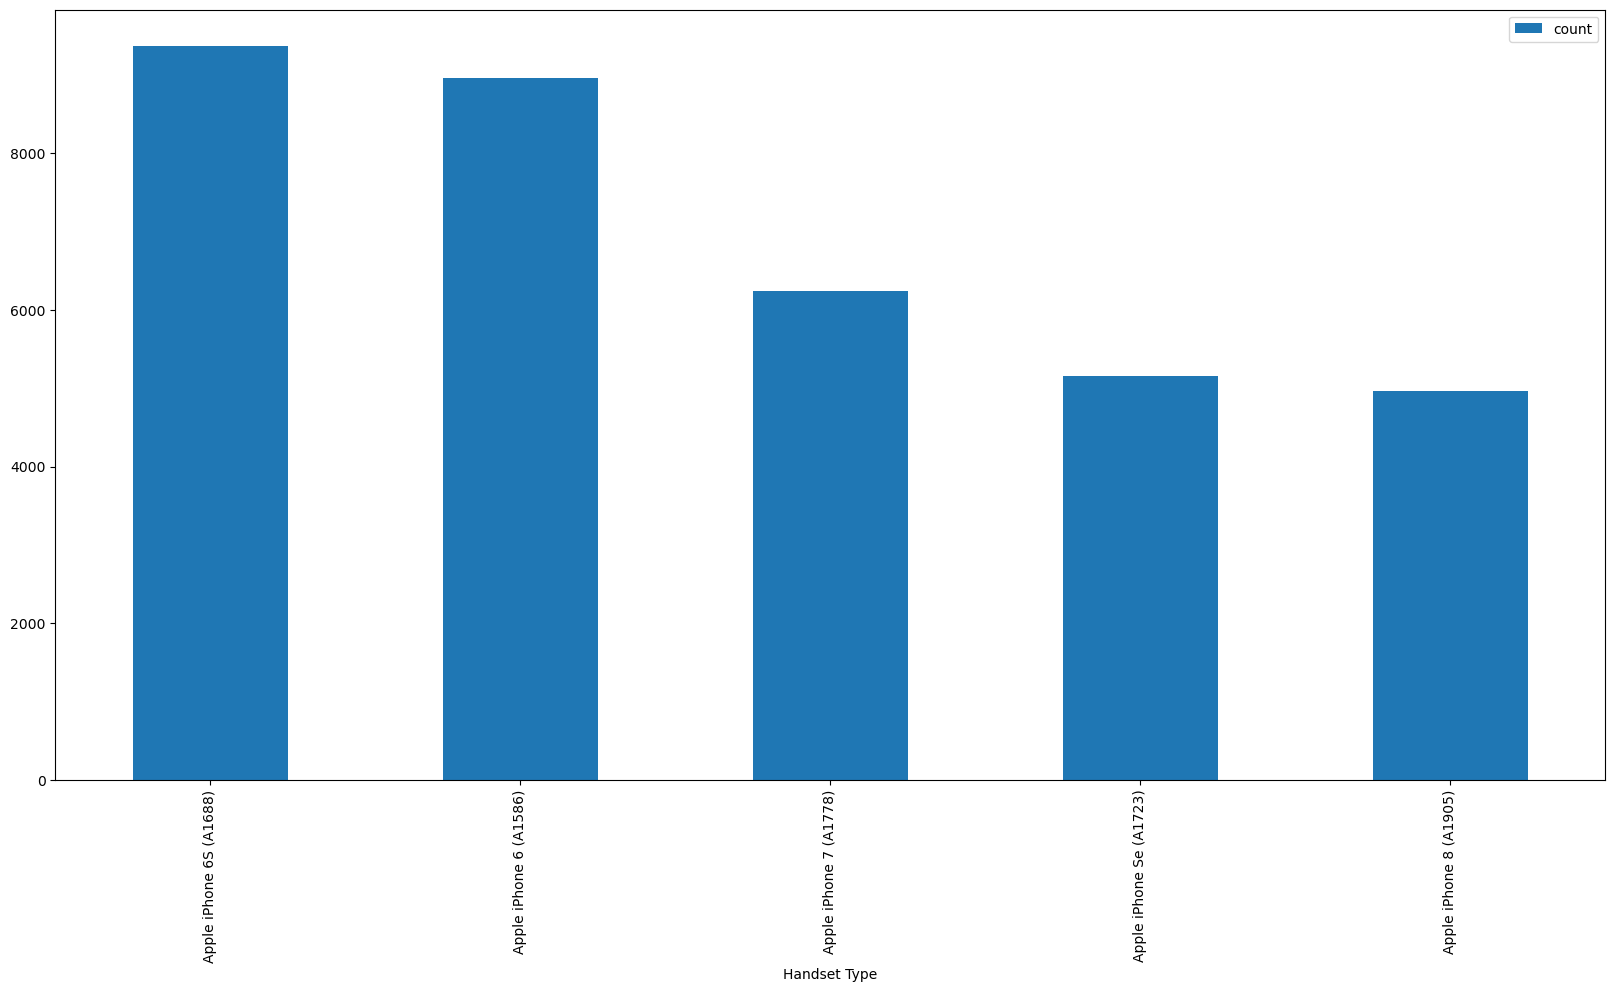

In [194]:
apple_manu = clean_df[clean_df['Handset Manufacturer'] == 'Apple']
pd.DataFrame(apple_manu['Handset Type'].value_counts()[:5]).plot(kind='bar',figsize=(20,10))

<Axes: xlabel='Handset Type'>

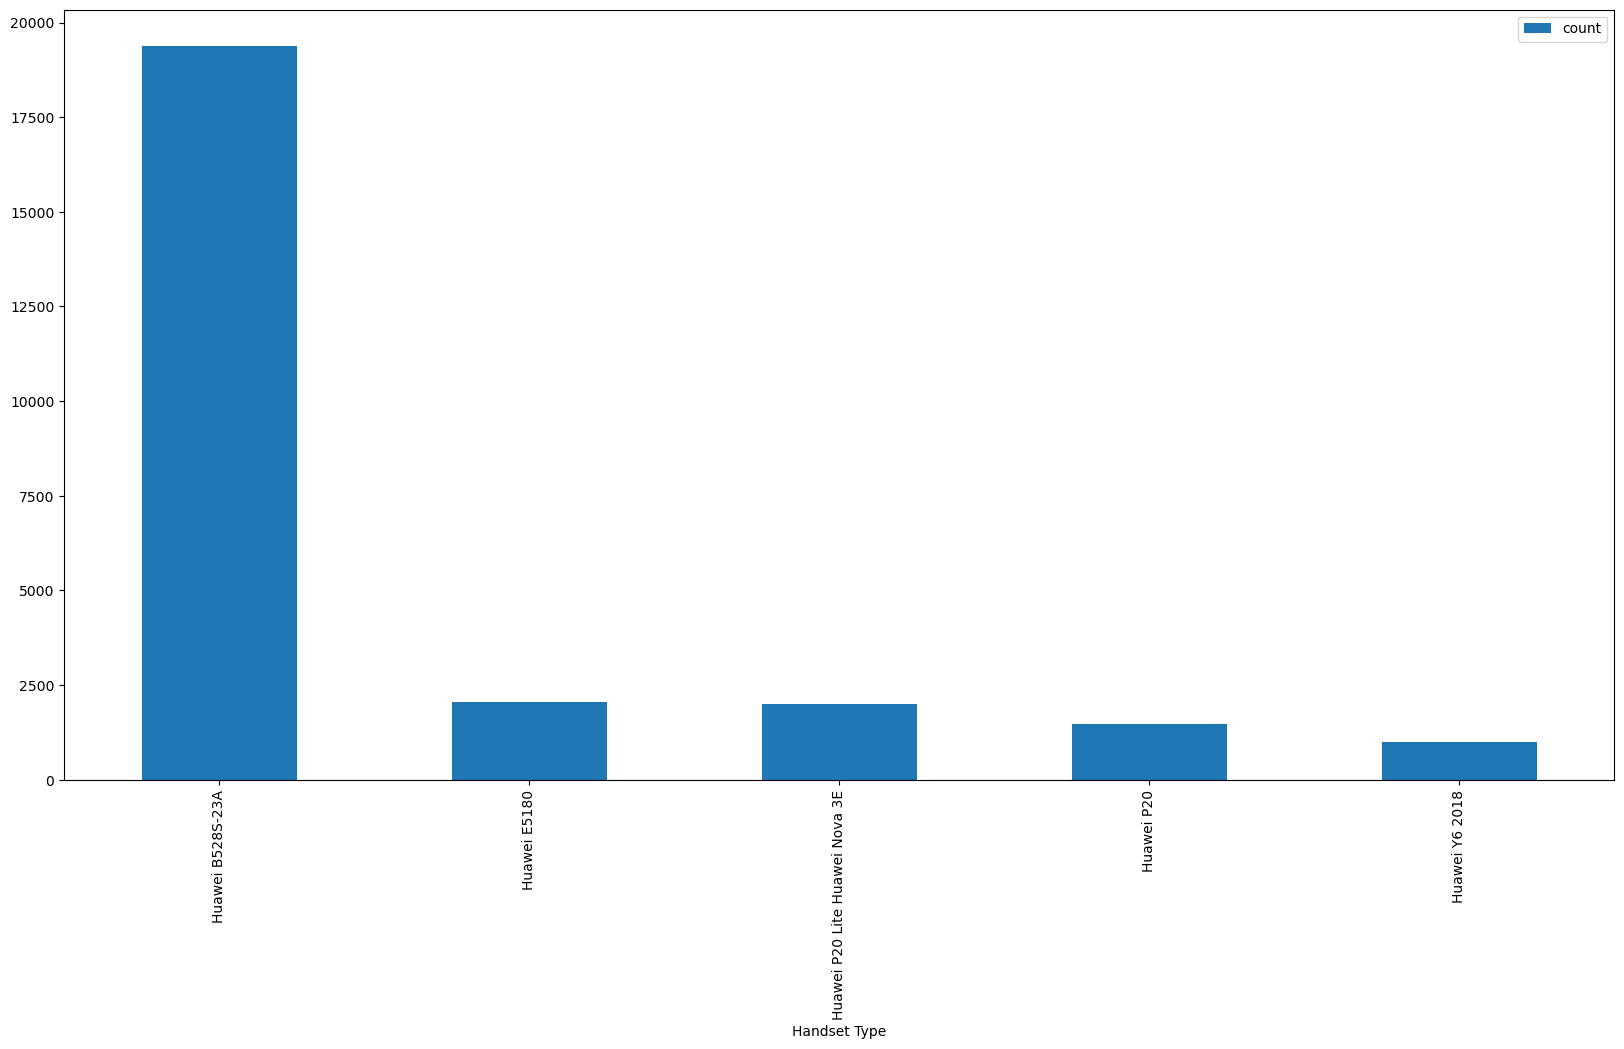

In [195]:
huawei_manu = clean_df[clean_df['Handset Manufacturer'] == 'Huawei']
pd.DataFrame(huawei_manu['Handset Type'].value_counts()[:5]).plot(kind='bar',figsize=(20,10))

In [196]:
clean_df.columns


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',


# Fix Outliers

In [231]:
def fix_outliers(df: pd.DataFrame):
    #Replace Outlier values
    for col in df.select_dtypes('float64').columns.tolist():
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - (IQR * 1.5)
        upper = Q3 + (IQR * 1.5)

        df[col] = np.where(df[col] > upper, upper, df[col])
        df[col] = np.where(df[col] < lower, lower, df[col])
    return df

def hist(df:pd.DataFrame, column:str, color:str='orange')->None:
    sns.displot(data=df, x=column, color=color, kde=True, height=6, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
def scatter(df: pd.DataFrame, x_col: str, y_col: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(f'{x_col} Vs. {y_col}\n', size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

<Axes: >

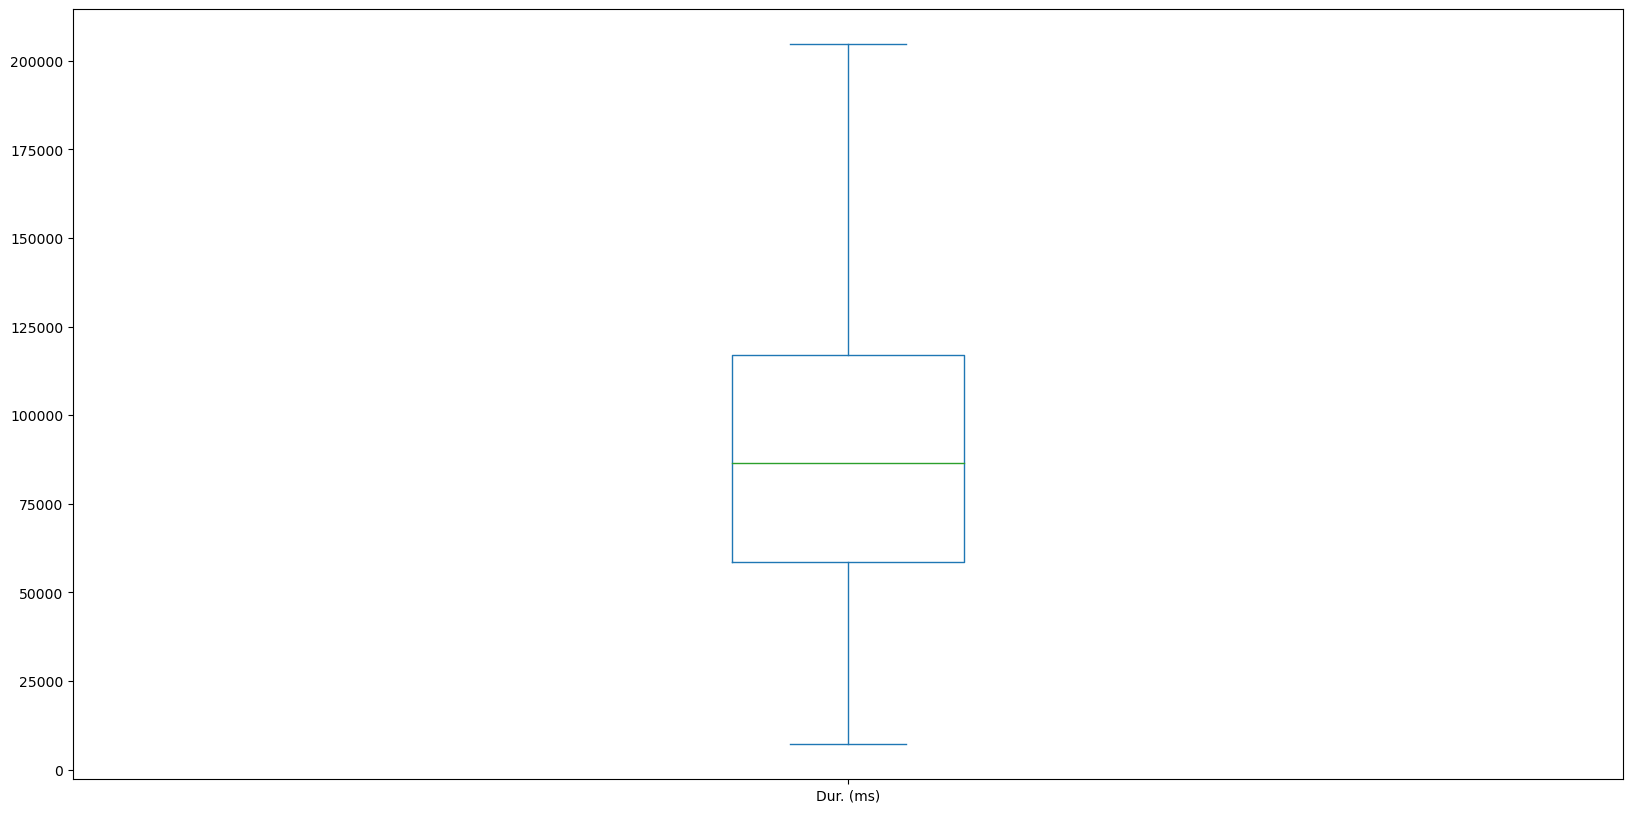

In [206]:
clean_df = fix_outliers(clean_df)
# clean_df['Dur. (ms)'] = np.where(clean_df['Dur. (ms)'] > clean_df['Dur. (ms)'].quantile(0.95), clean_df['Dur. (ms)'].median(),clean_df['Dur. (ms)'])

clean_df['Dur. (ms)'].plot(kind='box',figsize=(20,10))
# clean_df.dtypes


# Start Univariant Analysis

# Duration (ms)

C:\Users\Fandingo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


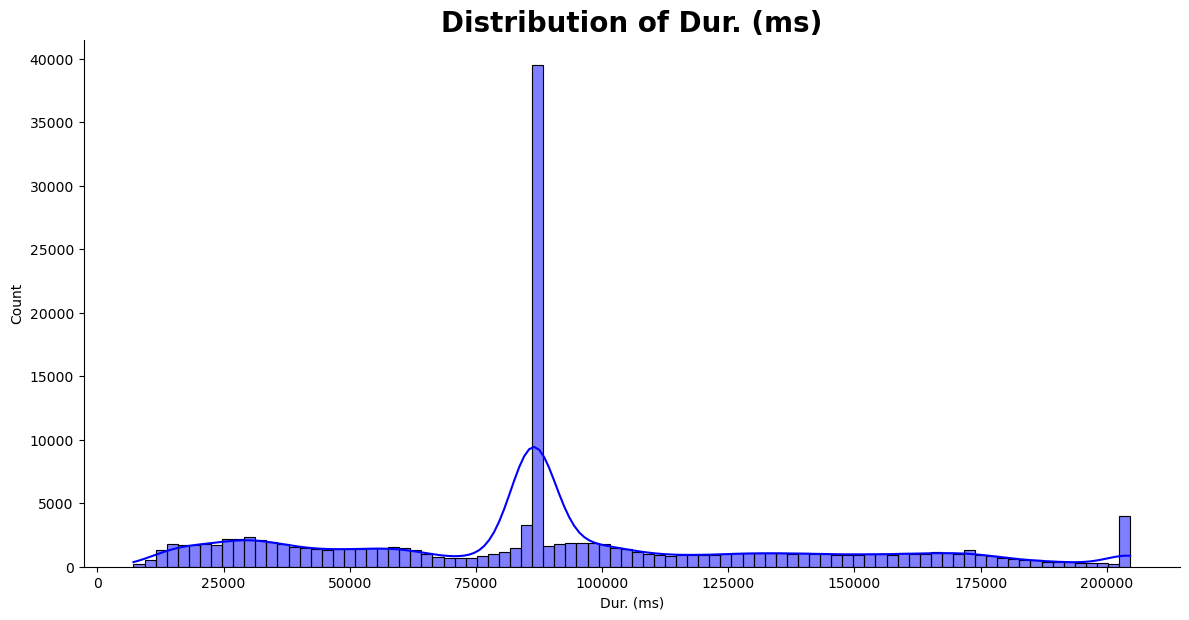

In [213]:
#Plot duration
hist(clean_df, 'Dur. (ms)', 'blue')

In [236]:
clean_df['Data_Volume_Gaming (Bytes)'] = clean_df['Gaming DL (Bytes)'] +  clean_df['Gaming UL (Bytes)']
clean_df['Data_Volume_Social (Bytes)'] = clean_df['Social Media DL (Bytes)'] +  clean_df['Social Media UL (Bytes)']
clean_df['Data_Volume_Google (Bytes)'] = clean_df['Google DL (Bytes)'] +  clean_df['Google UL (Bytes)']
clean_df['Data_Volume_Email (Bytes)'] = clean_df['Email DL (Bytes)'] +  clean_df['Email UL (Bytes)']
clean_df['Data_Volume_Youtube (Bytes)'] = clean_df['Youtube DL (Bytes)'] +  clean_df['Youtube UL (Bytes)']
clean_df['Data_Volume_Netflix (Bytes)'] = clean_df['Netflix DL (Bytes)'] +  clean_df['Netflix UL (Bytes)']                                                               
clean_df['Data_Volume_Other (Bytes)'] = clean_df['Other DL (Bytes)'] +  clean_df['Other UL (Bytes)']
clean_df['Data_Volume_Total (Bytes)'] = clean_df['Total DL (Bytes)'] +  clean_df['Total UL (Bytes)']
agg = clean_df.groupby('MSISDN/Number')[['Data_Volume_Gaming (Bytes)','Data_Volume_Social (Bytes)','Data_Volume_Google (Bytes)'\
                                 ,'Data_Volume_Email (Bytes)','Data_Volume_Youtube (Bytes)','Data_Volume_Netflix (Bytes)'\
                                 ,'Data_Volume_Other (Bytes)','Data_Volume_Total (Bytes)','Dur. (ms)']].aggregate('sum')
agg_df = pd.DataFrame(agg)
agg_df['count'] = clean_df['MSISDN/Number'].value_counts()
agg_df

Data_Volume_Gaming (Bytes)  Data_Volume_Social (Bytes)  \
MSISDN/Number                                                             
33601001722                    8.124587e+08                   2232135.0   
33601001754                    1.197501e+08                   2660565.0   
33601002511                    5.388277e+08                   3195623.0   
33601007832                    3.911261e+08                    280294.0   
33601008617                    1.314798e+09                   2912542.0   
...                                     ...                         ...   
33789967113                    1.348159e+08                   1413370.0   
33789980299                    9.723450e+08                   4250312.0   
33789996170                    6.603614e+08                    300183.0   
33789997247                    4.370033e+08                    498569.0   
337000037000919                5.101427e+08                    521566.0   

                 Data_Volume_Google (Bytes)  Data_Volume_Email (Bytes)  \
MSISDN/Number                                                            
33601001722                       4389005.0                  1331362.0   
33601001754                       5334863.0                  3307781.0   
33601002511                       3443126.0                  3205380.0   
33601007832                       9678493.0                  2284670.0   
33601008617                      18499616.0                  3305469.0   
...                                     ...                        ...   
33789967113                       9892882.0                  3396607.0   
33789980299                      10246473.0                  5315327.0   
33789996170                       7531269.0                  1006915.0   
33789997247                       5429705.0                  2514097.0   
337000037000919                   9830617.0                  3318582.0   

                 Data_Volume_Youtube (Bytes)  Data_Volume_Netflix (Bytes)  \
MSISDN/Number                                                               
33601001722                       21624548.0                   27180981.0   
33601001754                       12432223.0                   11221763.0   
33601002511                       21333570.0                   19353900.0   
33601007832                        6977321.0                    1942092.0   
33601008617                       41533002.0                   49201724.0   
...                                      ...                          ...   
33789967113                       28226479.0                   30370302.0   
33789980299                       38012812.0                   51950311.0   
33789996170                       26647843.0                   14902538.0   
33789997247                       19851572.0                    8531060.0   
337000037000919                   36734940.0                   30905042.0   

                 Data_Volume_Other (Bytes)  Data_Volume_Total (Bytes)  \
MSISDN/Number                                                           
33601001722                   3.865709e+08               8.786906e+08   
33601001754                   2.817101e+08               1.568596e+08   
33601002511                   5.016937e+08               5.959665e+08   
33601007832                   3.527970e+07               4.223207e+08   
33601008617                   8.048045e+08               1.457411e+09   
...                                    ...                        ...   
33789967113                   4.081072e+08               2.081231e+08   
33789980299                   1.075140e+09               1.094693e+09   
33789996170                   2.952828e+08               7.146416e+08   
33789997247                   2.111151e+08               4.803073e+08   
337000037000919               1.491884e+08               5.962878e+08   

                 Dur. (ms)  count  
MSISDN/Number                      
33601001722       116720.0      1  
33601001754       

# Data Volume Gaming

C:\Users\Fandingo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


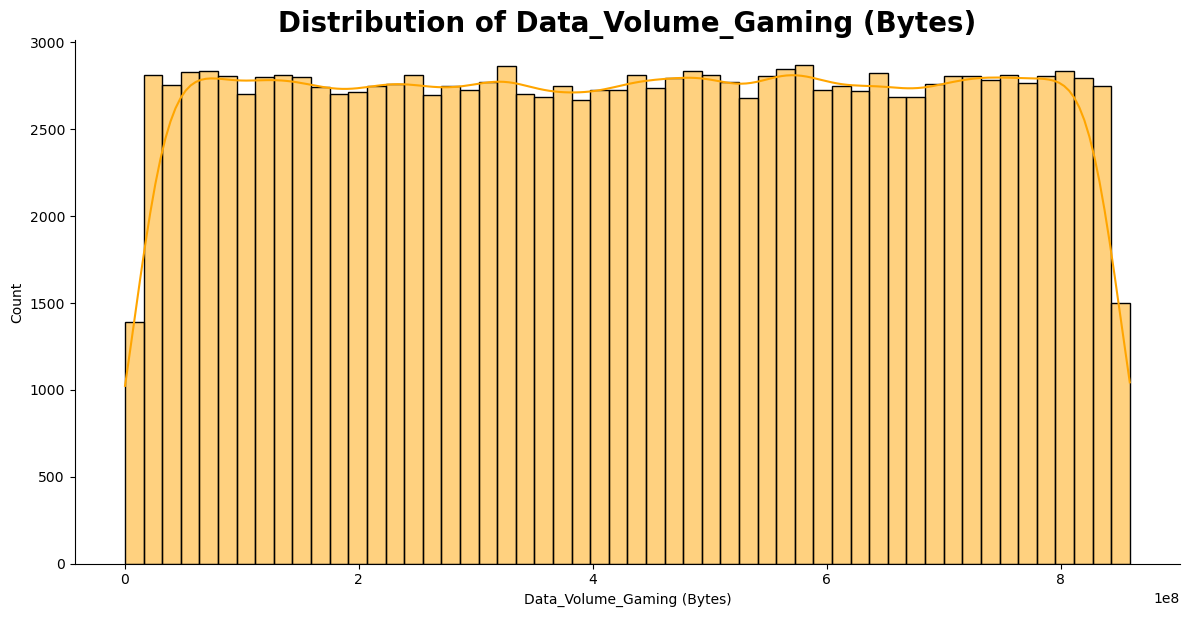

In [237]:
hist(clean_df, 'Data_Volume_Gaming (Bytes)')

# Data Volume Social

C:\Users\Fandingo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


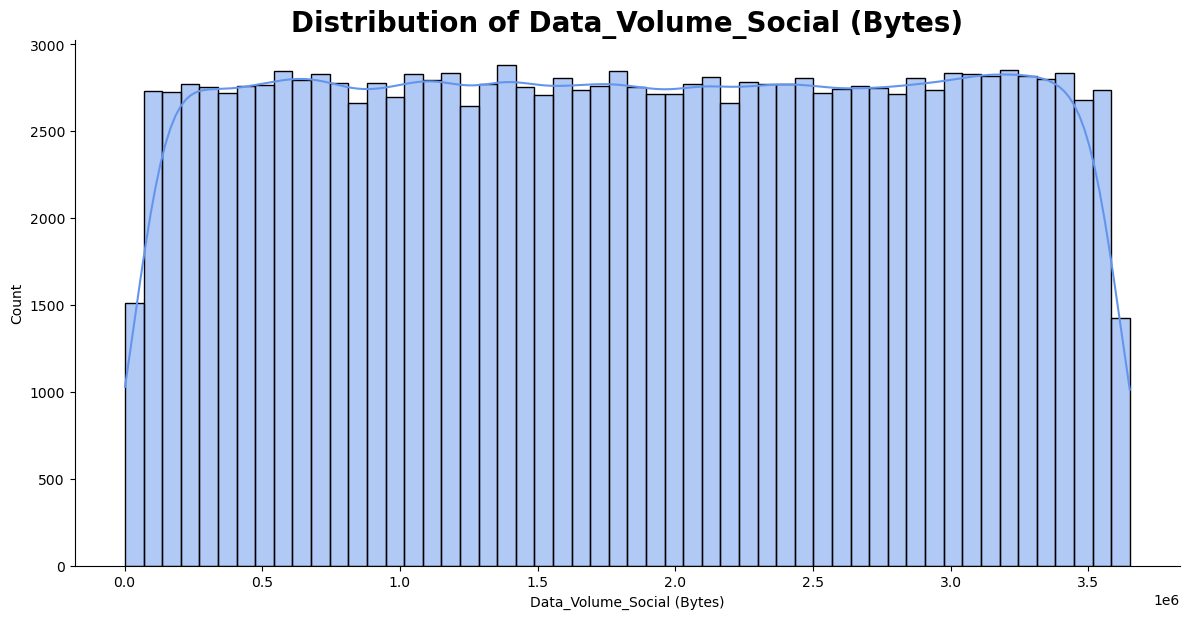

In [224]:
hist(clean_df, 'Data_Volume_Social (Bytes)')

# Data Volume Google

C:\Users\Fandingo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


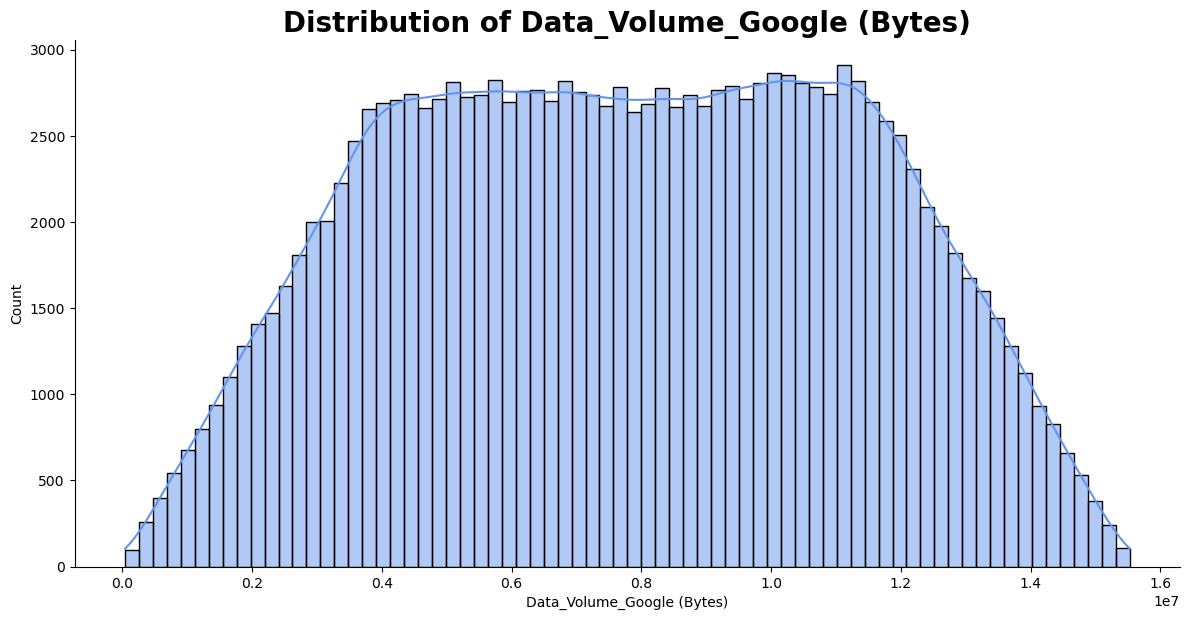

In [225]:
hist(clean_df, 'Data_Volume_Google (Bytes)')

# Data Volume Email

C:\Users\Fandingo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


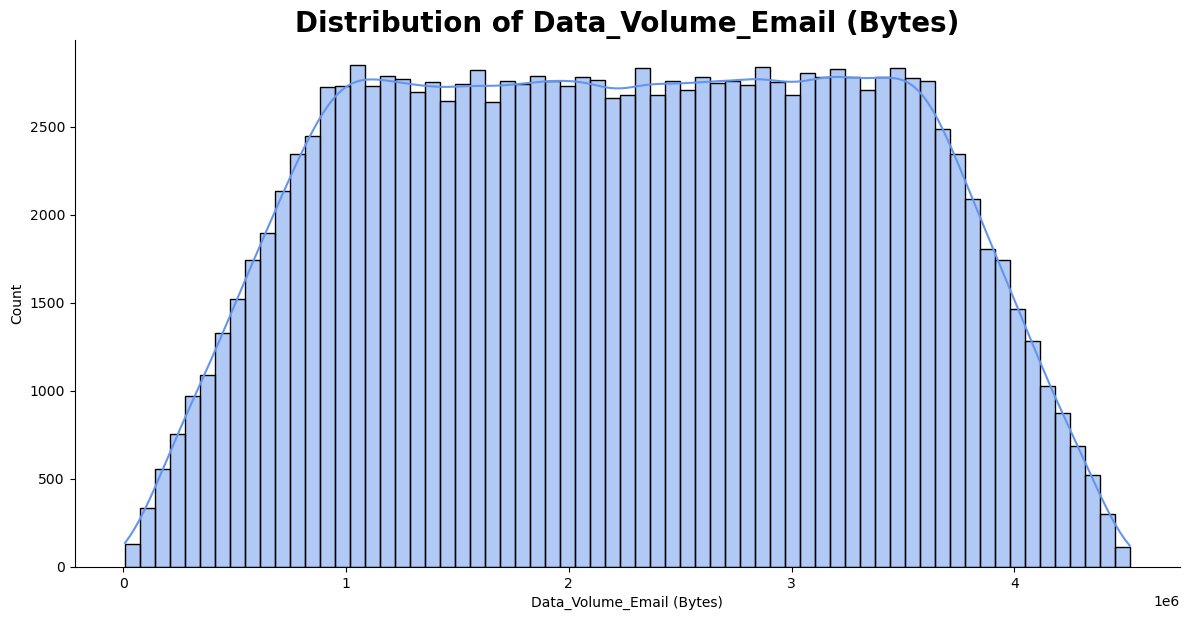

In [226]:
hist(clean_df, 'Data_Volume_Email (Bytes)')

# Data Volume Youtube

C:\Users\Fandingo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


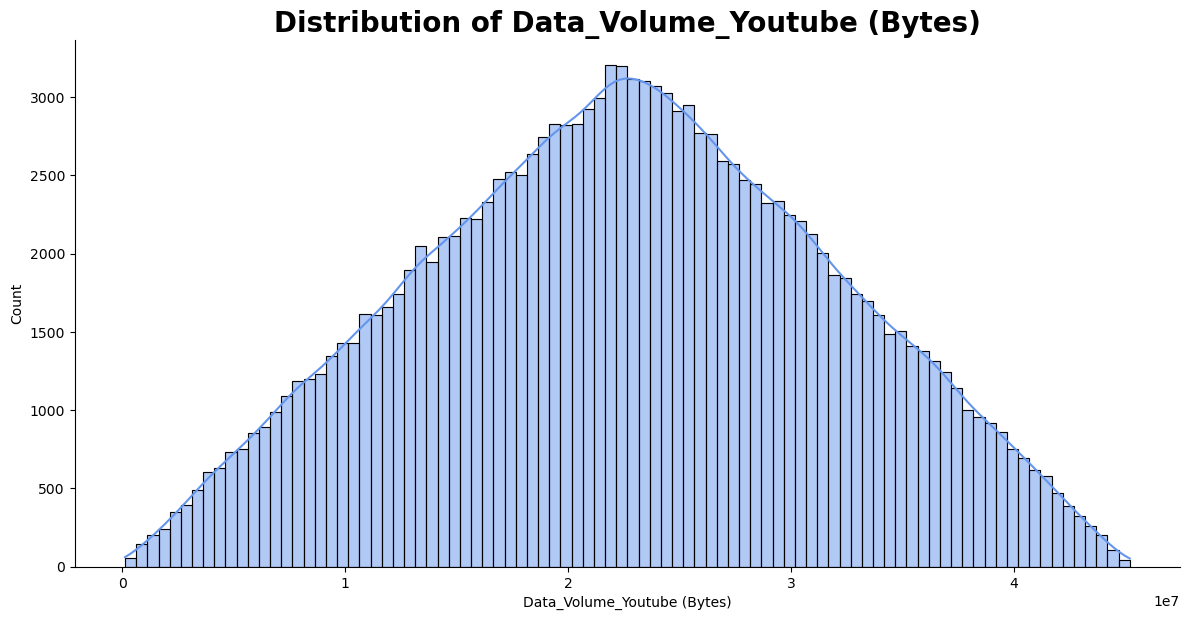

In [227]:
hist(clean_df, 'Data_Volume_Youtube (Bytes)')

# Data Volume Netflix

C:\Users\Fandingo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


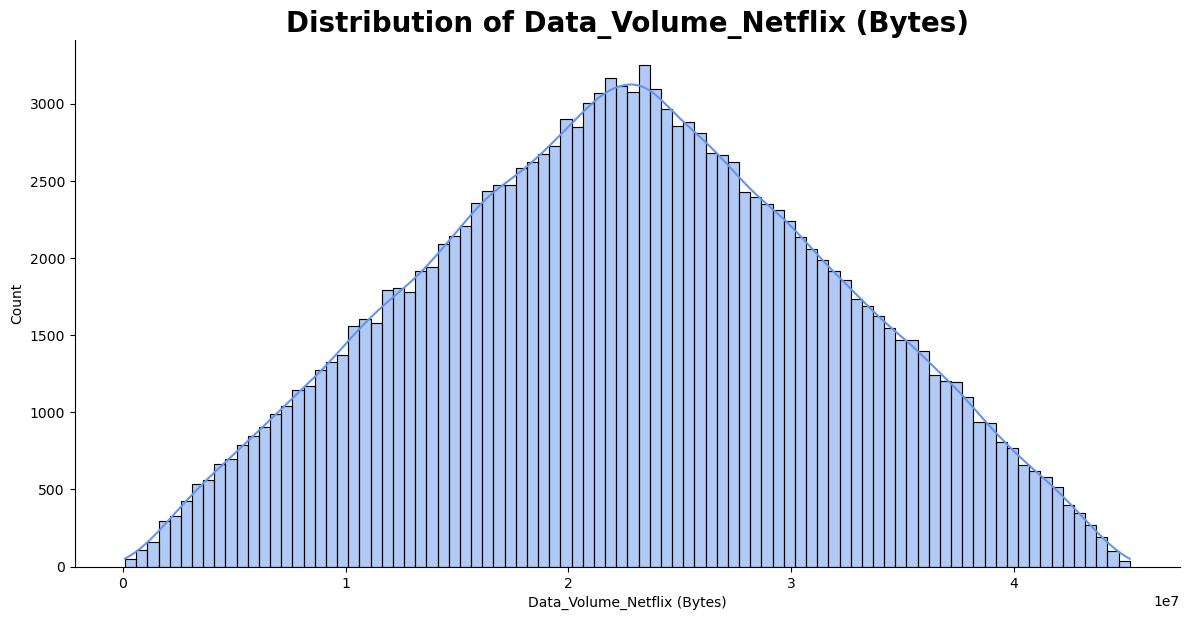

In [228]:
hist(clean_df, 'Data_Volume_Netflix (Bytes)')

# Data Volume Other

C:\Users\Fandingo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


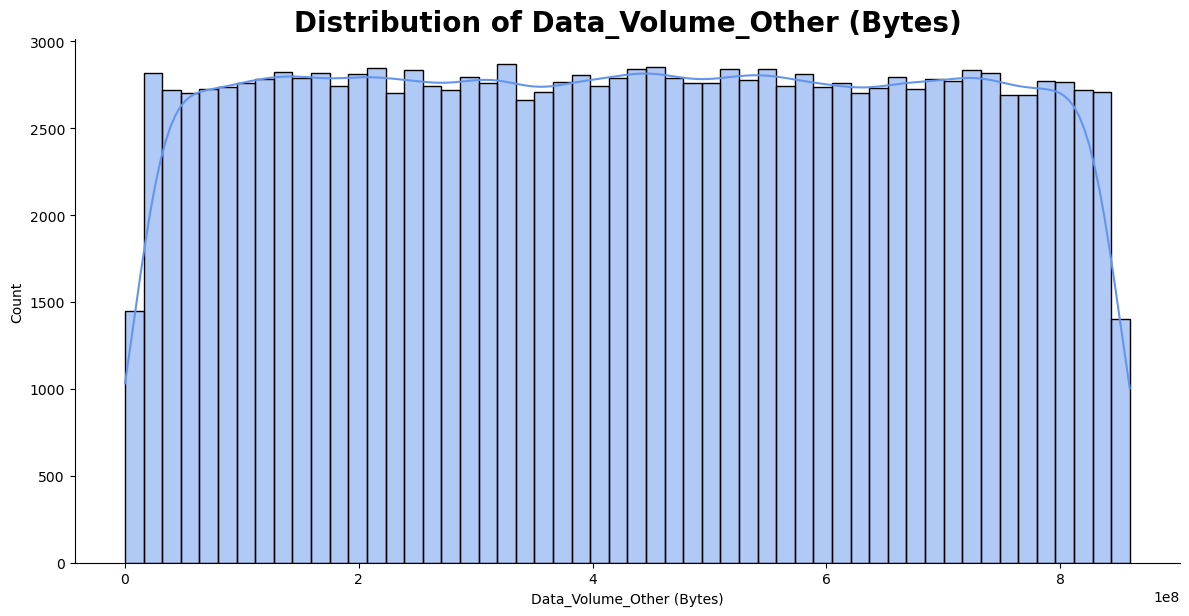

In [229]:
hist(clean_df, 'Data_Volume_Other (Bytes)')

# Bivariant Analysis

# Gaming Data Volume vs Total Data Volume

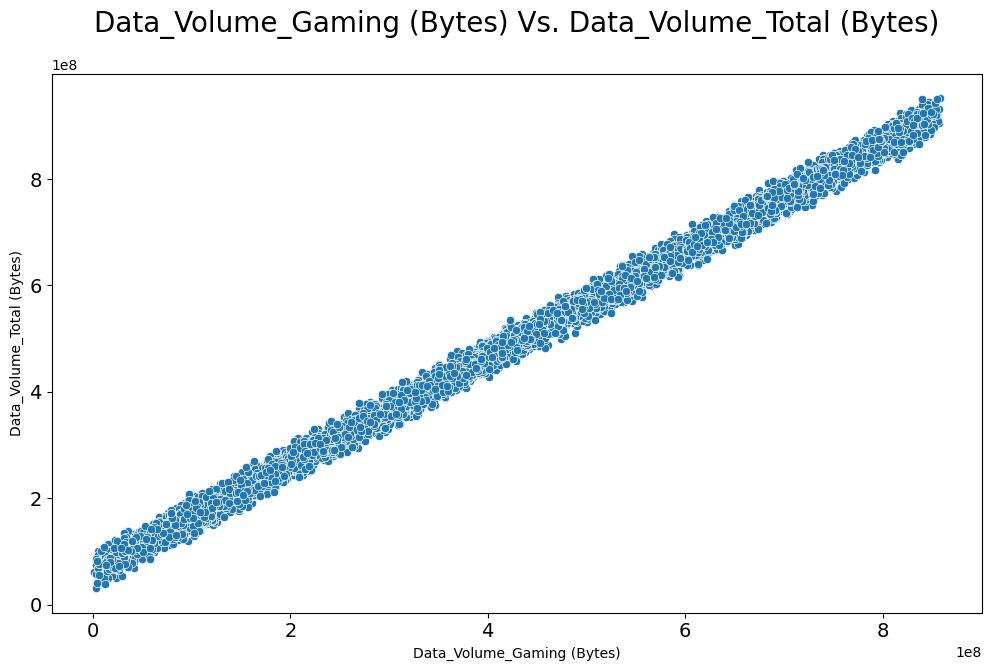

In [238]:
scatter(clean_df.sample(10000), 'Data_Volume_Gaming (Bytes)', 'Data_Volume_Total (Bytes)')

# Social Media Data Volume vs Total Data Volume

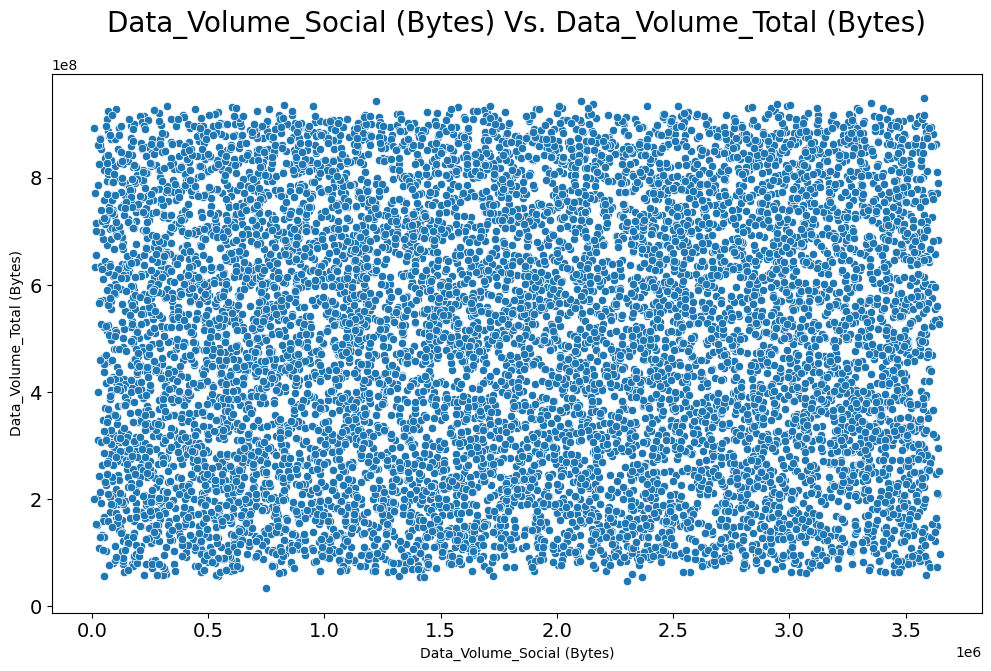

In [239]:
scatter(clean_df.sample(10000), 'Data_Volume_Social (Bytes)', 'Data_Volume_Total (Bytes)')

# Google Data Volume vs Total Data Volume

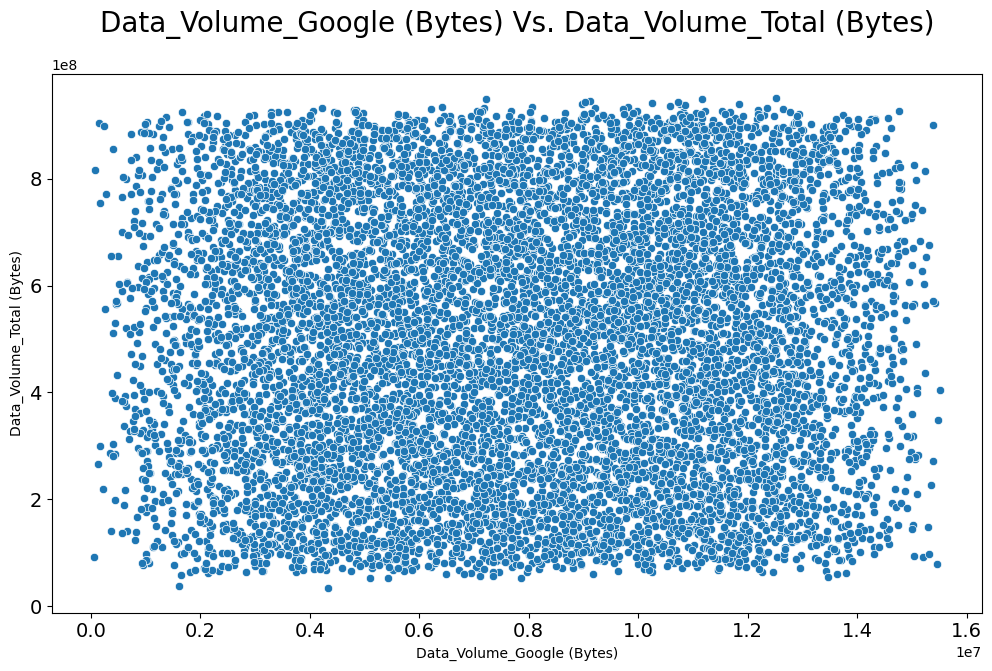

In [240]:
scatter(clean_df.sample(10000), 'Data_Volume_Google (Bytes)', 'Data_Volume_Total (Bytes)')

# Email Data Volume vs Total Data Volume

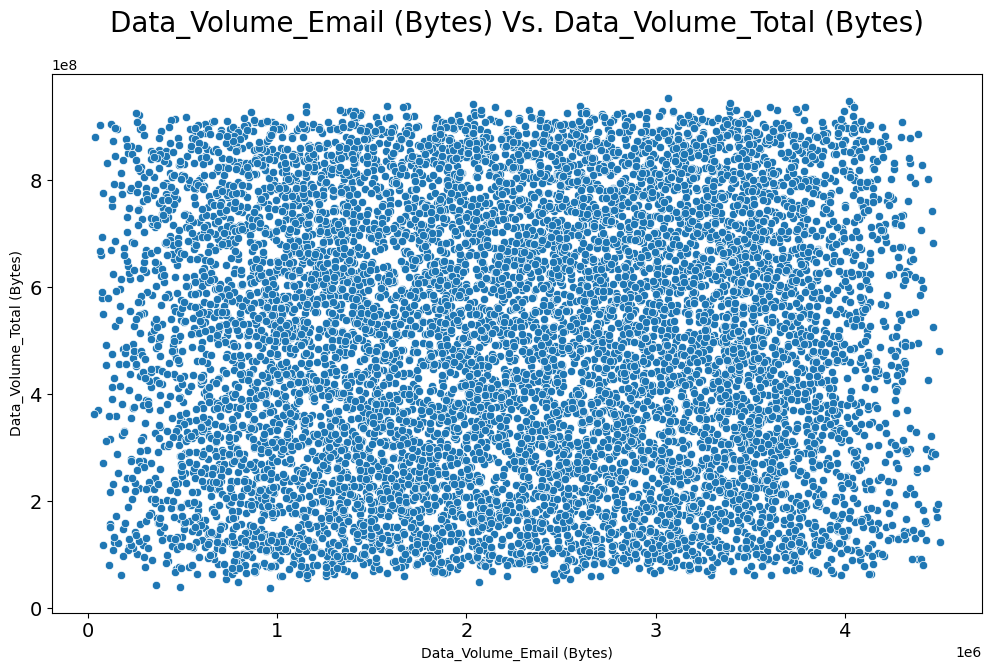

In [241]:
scatter(clean_df.sample(10000), 'Data_Volume_Email (Bytes)', 'Data_Volume_Total (Bytes)')

# Youtube Data Volume vs Total Data Volume

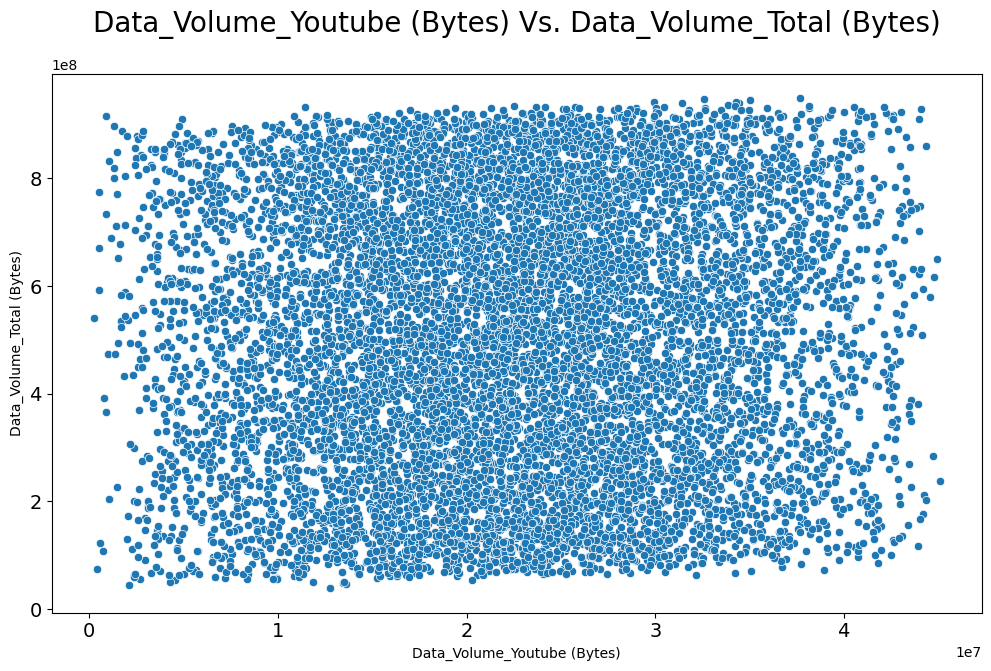

In [242]:
scatter(clean_df.sample(10000), 'Data_Volume_Youtube (Bytes)', 'Data_Volume_Total (Bytes)')

# Netflix Data Volume vs Total Data Volume

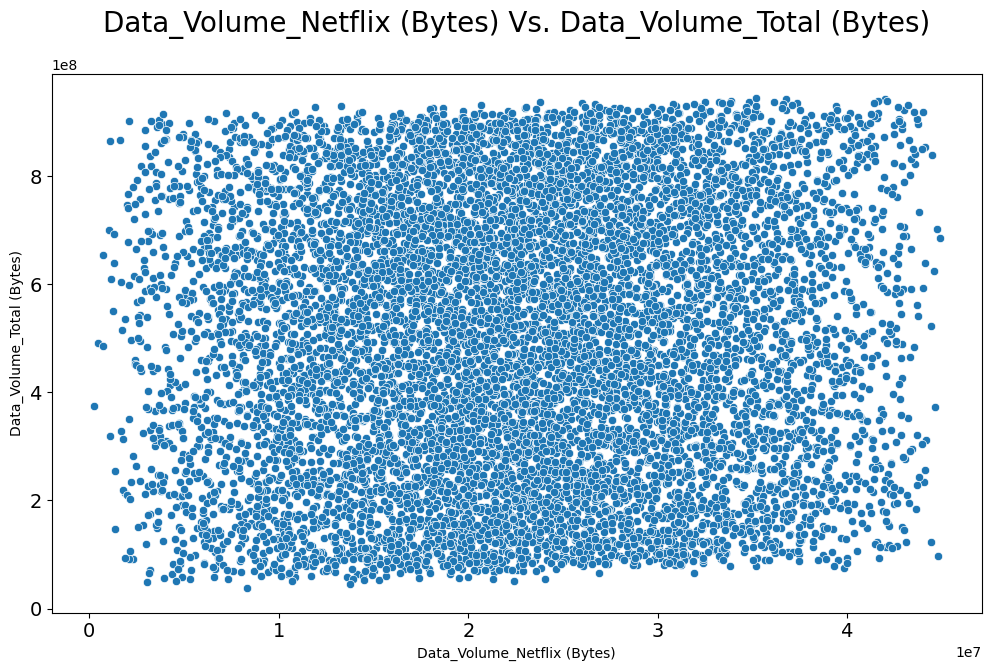

In [244]:
scatter(clean_df.sample(10000), 'Data_Volume_Netflix (Bytes)', 'Data_Volume_Total (Bytes)')

# Other Data Volume vs Total Data Volume

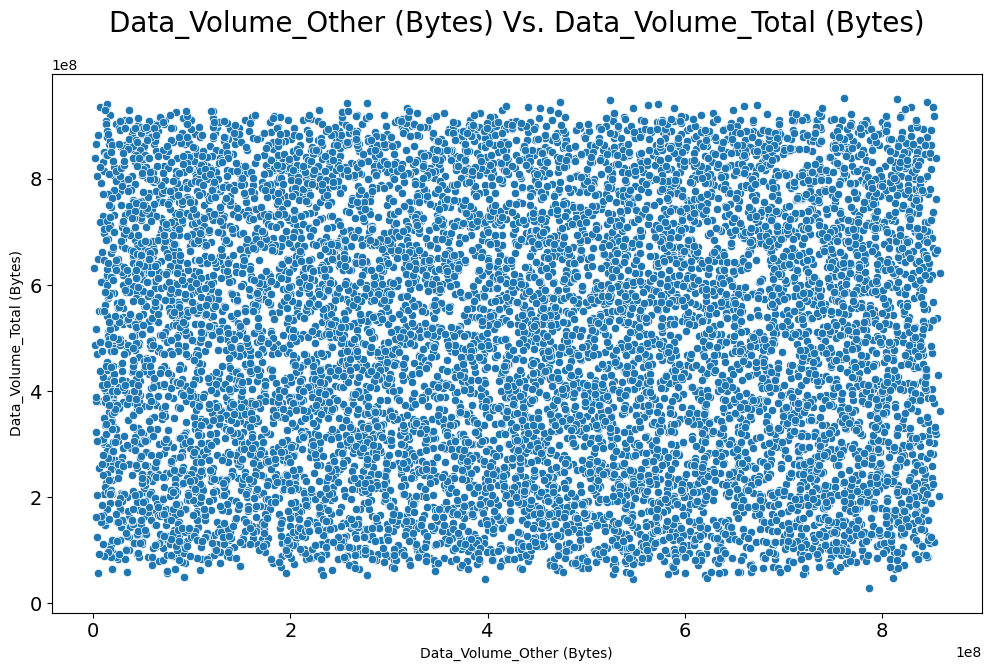

In [245]:
scatter(clean_df.sample(10000), 'Data_Volume_Other (Bytes)', 'Data_Volume_Total (Bytes)')